In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import xticks
%matplotlib inline
pd.set_option("display.max_columns", 35)


from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
Leads = pd.read_csv("Leads.csv")
Leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search  ... Newspaper  \
0                       Better Career Prospects     No  ...        No   
1                       Better Career Prospects     No  ...        No   
2                       Better Career Prospects     No  ...        No   
3                       Better Career Prospects     No  ...        No   
4                       Better Career Prospects     No  ...        No   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

       Lead Quality Update me on Supply Chain Content  \
0  Low in Relevance                                No   
1               NaN                                No   
2          Might be                                No   
3          Not Sure                                No   
4          Might be                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0   

In [3]:
Leads = Leads.replace('Select',np.NaN)
Leads = Leads.replace('No',0)
Leads= Leads.replace('Yes',1)

In [4]:
Leads.shape[1]

37

In [5]:
count = 0 
for i in range(len(Leads.index)) :
    if  100*( Leads.iloc[i].isnull().sum()/Leads.shape[1]) > 70:
        count = count +1
        print("more than 70%")
#         df.drop(i) 
print(count)

0


No rows which have more than 70% missing data

In [6]:
missing = pd.DataFrame(Leads.isnull().sum())
missing.columns ={'%'}
missing['%'] = missing['%'].apply(lambda x: round(100*(x/len(Leads)),2)) 

In [7]:
missing[missing['%']>40]

%
How did you hear about X Education  78.46
Lead Quality                        51.59
Lead Profile                        74.19
Asymmetrique Activity Index         45.65
Asymmetrique Profile Index          45.65
Asymmetrique Activity Score         45.65
Asymmetrique Profile Score          45.65

In [8]:
missing40 = missing[missing['%']>40].index
missing40

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [9]:
missing[(missing['%']<=40) & (missing['%']>=30)]

%
Specialization  36.58
Tags            36.29
City            39.71

In [10]:
missing[(missing['%']<=30) & (missing['%']>0)]

%
Lead Source                                     0.39
TotalVisits                                     1.48
Page Views Per Visit                            1.48
Last Activity                                   1.11
Country                                        26.63
What is your current occupation                29.11
What matters most to you in choosing a course  29.32

##### We would be checking the data with missing values one by one

### How did you hear about X Education

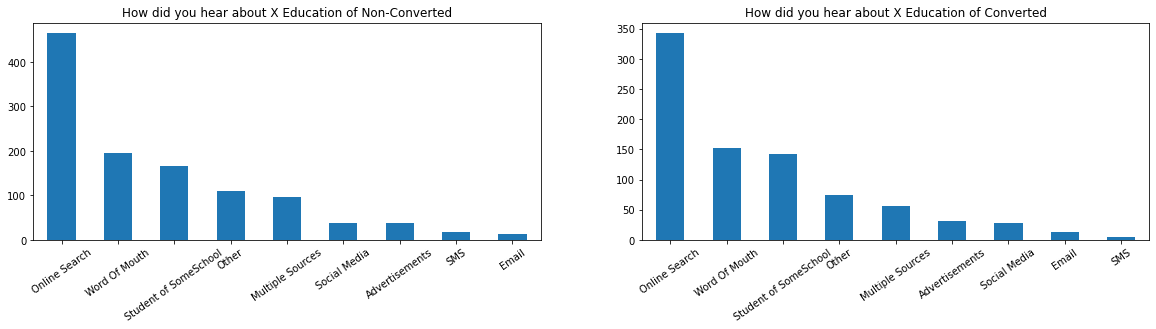

In [11]:
# How did you hear about X Education
# 78.46% Data is missing 

plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.title('How did you hear about X Education of Non-Converted')
Leads[Leads.Converted == 0]['How did you hear about X Education'].value_counts().plot(kind='bar',rot=35)

plt.subplot(1, 2, 2)
plt.title('How did you hear about X Education of Converted')
Leads[Leads.Converted == 1]['How did you hear about X Education'].value_counts().plot(kind='bar',rot=35)
plt.show()

# Most number of Leads coming from Online Search , Word of mouth or Student of same school. We can drop this column 

### Specialization

In [12]:
Leads['Specialization'].isnull().sum()

3380

In [13]:
Leads['Specialization'].mode()[0]
                             

'Finance Management'

In [14]:
counts = pd.DataFrame(Leads['Specialization'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Finance Management                   976  10.56
Human Resource Management            848   9.18
Marketing Management                 838   9.07
Operations Management                503   5.44
Business Administration              403   4.36
IT Projects Management               366   3.96
Supply Chain Management              349   3.78
Banking, Investment And Insurance    338   3.66
Media and Advertising                203   2.20
Travel and Tourism                   203   2.20
International Business               178   1.93
Healthcare Management                159   1.72
Hospitality Management               114   1.23
E-COMMERCE                           112   1.21
Retail Management                    100   1.08
Rural and Agribusiness                73   0.79
E-Business                            57   0.62
Services Excellence                   40   0.43

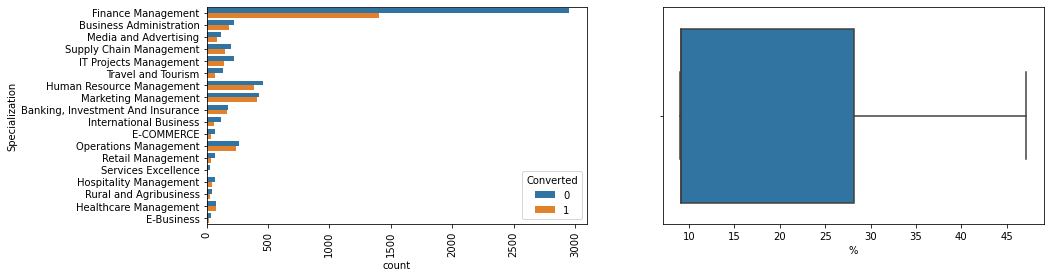

In [15]:
Leads['Specialization'].fillna(Leads['Specialization'].mode()[0],inplace=True)
counts = pd.DataFrame(Leads['Specialization'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 

fig, axs = plt.subplots(figsize = (15,4))
plt.subplot(1,2,1)
sns.countplot(y = "Specialization", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(counts[counts['%']>9]['%'])
plt.show()

In [16]:
SpecializationOther = counts[counts['%']<9].index
for i in SpecializationOther:
    Leads['Specialization'] = Leads['Specialization'].replace(i,'Others')
counts = pd.DataFrame(Leads['Specialization'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Finance Management          4356  47.14
Others                      3198  34.61
Human Resource Management    848   9.18
Marketing Management         838   9.07

### Lead Source

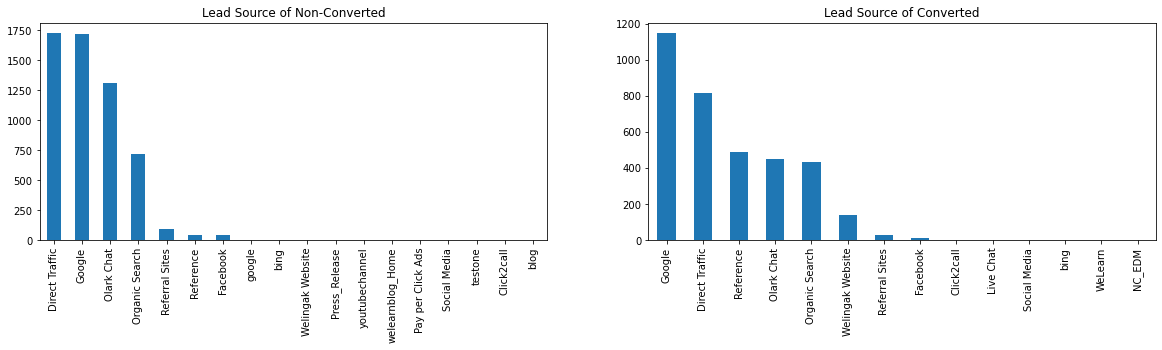

In [17]:
# Lead Source
# .39% Data is missing 

plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.title('Lead Source of Non-Converted')
Leads[Leads.Converted == 0]['Lead Source'].value_counts().plot(kind='bar',rot=90)

plt.subplot(1, 2, 2)
plt.title('Lead Source of Converted')
Leads[Leads.Converted == 1]['Lead Source'].value_counts().plot(kind='bar',rot=90)
plt.show()

# This shows vissible difference in converted and non conveter data 
#  missing value imputation will be done by the mode value 

In [18]:
#  both 'Google' & 'google' is present . Replacing 'google' with 'Google'
Leads['Lead Source'] =  Leads['Lead Source'].apply(lambda x:'Google' if x=='google' else x)
print('Converted : ',Leads[Leads.Converted == 1]['Lead Source'].mode())
print('Non Converted : ',Leads[Leads.Converted == 0]['Lead Source'].mode())


Converted :  0    Google
dtype: object
Non Converted :  0    Google
dtype: object


In [19]:
Leads['Lead Source'].fillna('Google')

0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object

In [20]:
Leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
testone                 1
WeLearn                 1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64

In [21]:
counts = pd.DataFrame(Leads['Lead Source'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 

# This is a skewed categorical data 
SourceOther = counts[counts['%']<11].index
for i in SourceOther:
    Leads['Lead Source'] = Leads['Lead Source'].replace(i,'Others')
counts = pd.DataFrame(Leads['Lead Source'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 

counts

count      %
Google           2873  31.09
Direct Traffic   2543  27.52
Olark Chat       1755  18.99
Organic Search   1154  12.49
Others            879   9.51

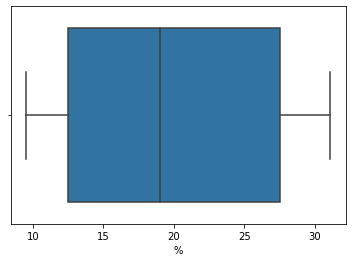

In [22]:
sns.boxplot(counts['%'])

### Total visits 

In [23]:
Leads['TotalVisits'].mode()

0    0.0
dtype: float64

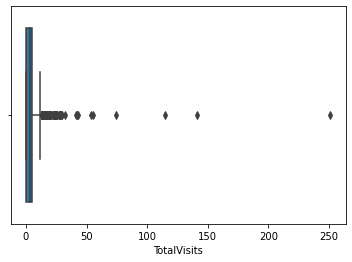

In [24]:
# Total visits is a Discrete umeric value. we will use mode value to fill the the null data 
# 1.48% Data is missing 
Leads['TotalVisits'].fillna(0.0,inplace=True)
sns.boxplot(Leads['TotalVisits'])

### Page Views Per Visit


In [25]:
Leads['Page Views Per Visit'].mode()

0    0.0
dtype: float64

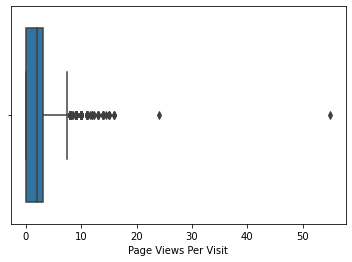

In [26]:
# Page Views Per Visit is a Discrete umeric value. we will use mode value to fill the the null data 
# 1.48% Data is missing 
Leads['Page Views Per Visit'].fillna(0.0,inplace=True)
sns.boxplot(Leads['Page Views Per Visit'])

### Last Activity

In [27]:
counts = pd.DataFrame(Leads['Last Activity'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts
# This is a skewed categorical data 

count      %
Email Opened                   3437  37.20
SMS Sent                       2745  29.71
Olark Chat Conversation         973  10.53
Page Visited on Website         640   6.93
Converted to Lead               428   4.63
Email Bounced                   326   3.53
Email Link Clicked              267   2.89
Form Submitted on Website       116   1.26
Unreachable                      93   1.01
Unsubscribed                     61   0.66
Had a Phone Conversation         30   0.32
Approached upfront                9   0.10
View in browser link Clicked      6   0.06
Email Received                    2   0.02
Email Marked Spam                 2   0.02
Visited Booth in Tradeshow        1   0.01
Resubscribed to emails            1   0.01

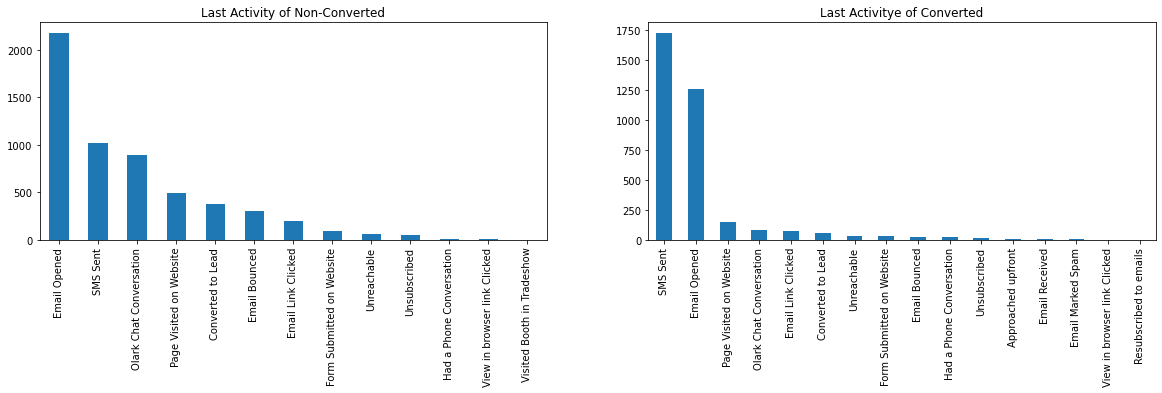

In [28]:

plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.title('Last Activity of Non-Converted')
Leads[Leads.Converted == 0]['Last Activity'].value_counts().plot(kind='bar',rot=90)

plt.subplot(1, 2, 2)
plt.title('Last Activitye of Converted')
Leads[Leads.Converted == 1]['Last Activity'].value_counts().plot(kind='bar',rot=90)
plt.show()

In [29]:
Leads['Last Activity'].mode()[0]

'Email Opened'

count      %
Email Opened                   3437  37.20
SMS Sent                       2745  29.71
Olark Chat Conversation         973  10.53
Page Visited on Website         640   6.93
Converted to Lead               428   4.63
Email Bounced                   326   3.53
Email Link Clicked              267   2.89
Form Submitted on Website       116   1.26
Unreachable                      93   1.01
Unsubscribed                     61   0.66
Had a Phone Conversation         30   0.32
Approached upfront                9   0.10
View in browser link Clicked      6   0.06
Email Received                    2   0.02
Email Marked Spam                 2   0.02
Visited Booth in Tradeshow        1   0.01
Resubscribed to emails            1   0.01

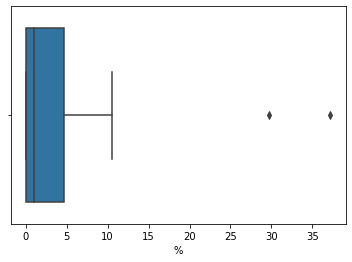

In [30]:
Leads['Last Activity'].fillna(Leads['Last Activity'].mode()[0])
counts = pd.DataFrame(Leads['Last Activity'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
sns.boxplot(counts['%'])
counts

### Country 

In [31]:
counts = pd.DataFrame(Leads['Country'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
India                  6492  70.26
United States            69   0.75
United Arab Emirates     53   0.57
Singapore                24   0.26
Saudi Arabia             21   0.23
United Kingdom           15   0.16
Australia                13   0.14
Qatar                    10   0.11
Bahrain                   7   0.08
Hong Kong                 7   0.08
France                    6   0.06
Oman                      6   0.06
unknown                   5   0.05
South Africa              4   0.04
Germany                   4   0.04
Nigeria                   4   0.04
Kuwait                    4   0.04
Canada                    4   0.04
Sweden                    3   0.03
China                     2   0.02
Ghana                     2   0.02
Italy                     2   0.02
Uganda                    2   0.02
Netherlands               2   0.02
Belgium                   2   0.02
Bangladesh                2   0.02
Asia/Pacific Region       2   0.02
Philippines               2   0.02
Sri Lanka                 1   0.01
Denmark                   1   0.01
Russia                    1   0.01
Tanzania                  1   0.01
Switzerland               1   0.01
Malaysia                  1   0.01
Kenya                     1   0.01
Indonesia                 1   0.01
Vietnam                   1   0.01
Liberia                   1   0.01

In [32]:
Leads['Country'].fillna('India',inplace=True)

In [33]:
for i in counts[counts['%']<10].index:
    Leads['Country'] = Leads['Country'].replace(i,'Others')
counts = pd.DataFrame(Leads['Country'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
India    8953  96.89
Others    287   3.11

### What is your current occupation	

In [34]:
counts = pd.DataFrame(Leads['What is your current occupation'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Unemployed             5600  60.61
Working Professional    706   7.64
Student                 210   2.27
Other                    16   0.17
Housewife                10   0.11
Businessman               8   0.09

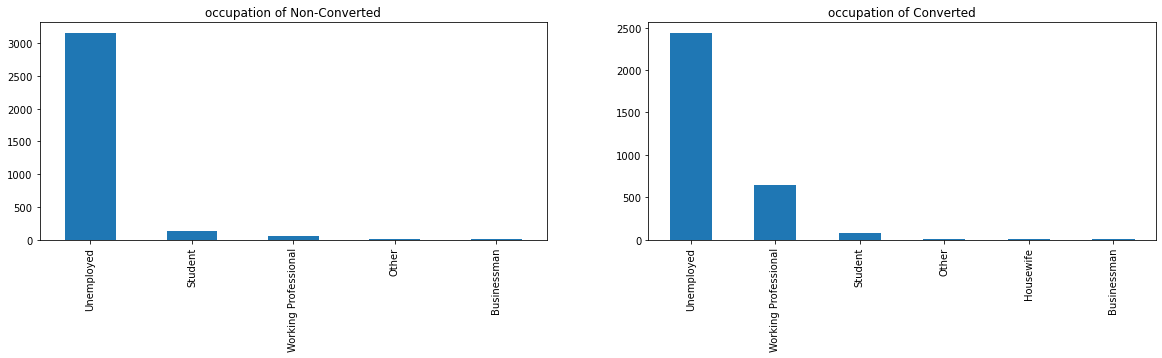

In [35]:

plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.title('occupation of Non-Converted')
Leads[Leads.Converted == 0]['What is your current occupation'].value_counts().plot(kind='bar',rot=90)

plt.subplot(1, 2, 2)
plt.title('occupation of Converted')
Leads[Leads.Converted == 1]['What is your current occupation'].value_counts().plot(kind='bar',rot=90)
plt.show()

In [36]:
Leads['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [37]:
Leads['What is your current occupation'].fillna('Unemployed', inplace=True)
for i in counts[counts['%']<10].index:
    Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(i,'Others')
counts = pd.DataFrame(Leads['What is your current occupation'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Unemployed   8290  89.72
Others        950  10.28

In [38]:
Leads['What is your current occupation'].value_counts()

Unemployed    8290
Others         950
Name: What is your current occupation, dtype: int64

### What matters most to you in choosing a course 

In [39]:
counts = pd.DataFrame(Leads['What matters most to you in choosing a course'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Better Career Prospects     6528  70.65
Flexibility & Convenience      2   0.02
Other                          1   0.01

In [40]:
Leads['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
dtype: object

In [41]:
Leads['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

In [42]:
counts = pd.DataFrame(Leads['What matters most to you in choosing a course'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Better Career Prospects     9237  99.97
Flexibility & Convenience      2   0.02
Other                          1   0.01

In [43]:
# An index and score given to each of the customer based on their activity and their profile

# Asymmetrique Activity Index  
# Asymmetrique Profile Index  
# Asymmetrique Activity Score     
# Asymmetrique Profile Score



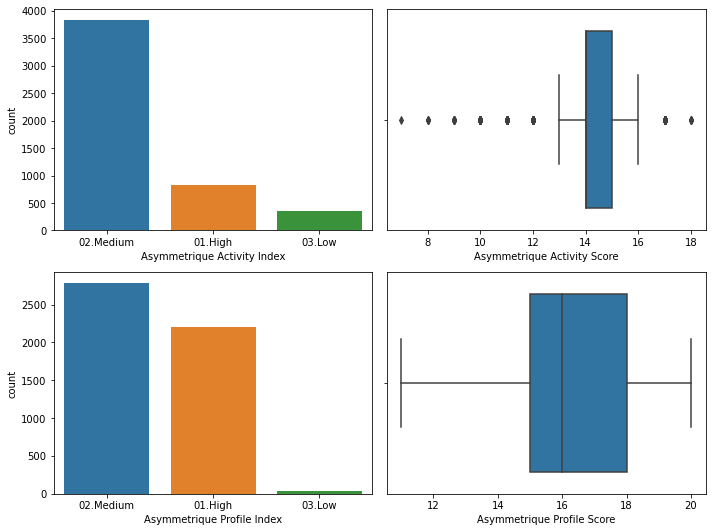

In [44]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(Leads['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(Leads['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(Leads['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(Leads['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

We can clearly see there is too much variation in these values plus 49% of the missing values. Hence we will get rid of these columns

In [45]:
# Leads = Leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [46]:
# Now after removing Asymetriques we will look at the city column
Leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [47]:
Leads["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [48]:
# Around 60% of the data is Mumbai that means mumbai is the mode value we can impute mumbai as the missing values in city.
Leads['City'] = Leads['City'].replace(np.nan, 'Mumbai')

In [49]:
# Now We will look at the "Tags" column of the data 
Leads.Tags.describe()


count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [50]:
Leads["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [51]:
Leads["Tags"].isnull().sum()

3353

In [52]:
# Blanks in the tags column may be imputed by 'Will revert after reading the email'.

Leads['Tags'] = Leads['Tags'].replace(np.nan, 'Will revert after reading the email')

# Exploratory Data Analytics

In [53]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0). We will be doing our
# analysis based on the Coverted column

Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

38.53896103896104

This means a total of 38.5 percent of the data is converted

## Univariate Analysis

### Lead Origin

In [54]:
counts = pd.DataFrame(Leads['Lead Origin'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Landing Page Submission   4886  52.88
API                       3580  38.74
Lead Add Form              718   7.77
Lead Import                 55   0.60
Quick Add Form               1   0.01

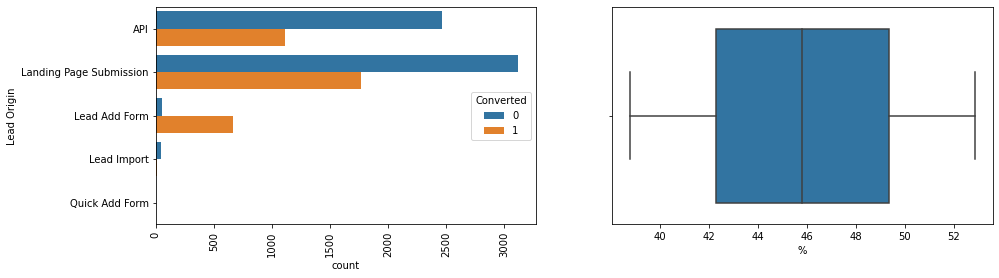

In [55]:
fig, axs = plt.subplots(figsize = (15,4))
plt.subplot(1,2,1)
sns.countplot(y = "Lead Origin", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(counts[counts['%']>10]['%'])
plt.show()

Lead Add Form,Lead Import,Quick Add Form will be clubed to a single categoty 

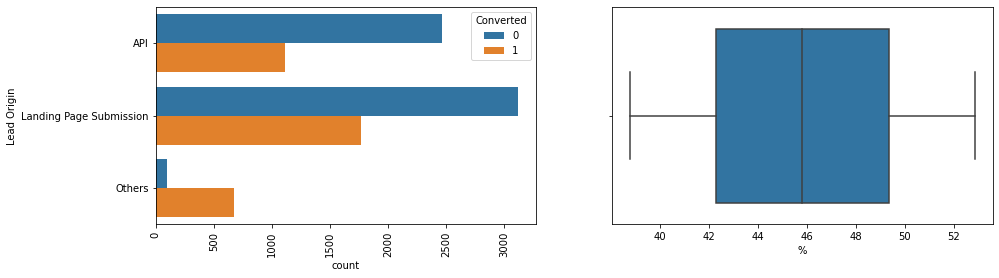

In [56]:
OriginOthers = counts[counts['%']<10].index
for i in counts[counts['%']<10].index:
    Leads['Lead Origin'] = Leads['Lead Origin'].replace(i,'Others')
counts = pd.DataFrame(Leads['Lead Origin'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 

fig, axs = plt.subplots(figsize = (15,4))
plt.subplot(1,2,1)
sns.countplot(y = "Lead Origin", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(counts[counts['%']>10]['%'])
plt.show()

### Lead Source

In [57]:
counts = pd.DataFrame(Leads['Lead Source'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Google           2873  31.09
Direct Traffic   2543  27.52
Olark Chat       1755  18.99
Organic Search   1154  12.49
Others            879   9.51

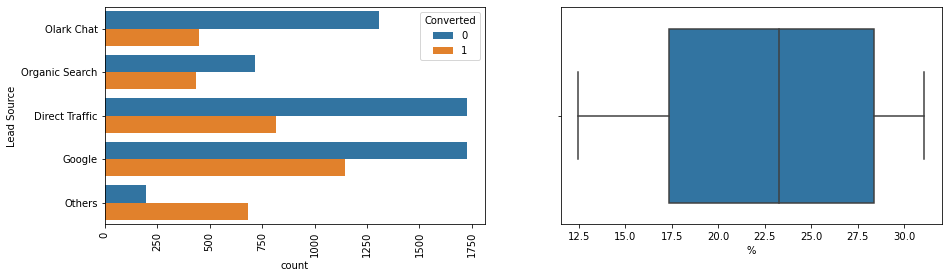

In [58]:
fig, axs = plt.subplots(figsize = (15,4))
plt.subplot(1,2,1)
sns.countplot(y = "Lead Source", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(counts[counts['%']>10]['%'])
plt.show()

### Do Not Email


In [59]:
Leads['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

### Do Not Call


In [60]:
Leads['Do Not Call'].value_counts()

0    9238
1       2
Name: Do Not Call, dtype: int64

### Total Visits

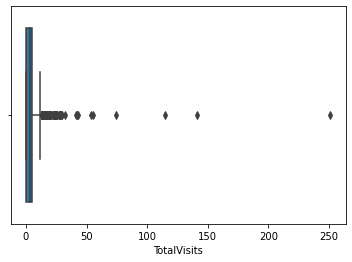

In [61]:
sns.boxplot(Leads['TotalVisits'])

### Total Time Spent

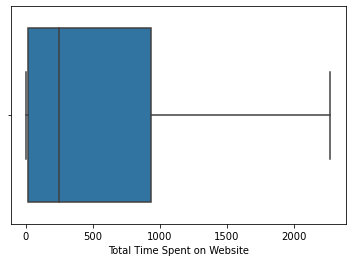

In [62]:
sns.boxplot(Leads['Total Time Spent on Website'])
#  No outliers.

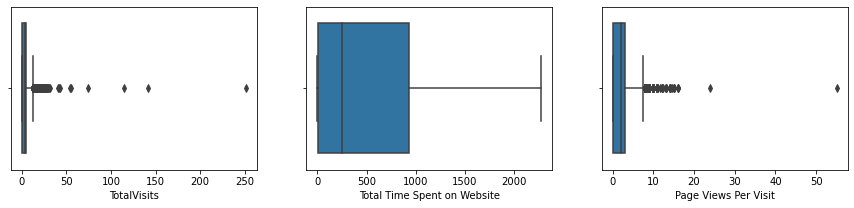

In [63]:
plt.figure(figsize = (15,3))
scaleColumns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
n= 1
for i in scaleColumns:
    plt.subplot(1,3,n)
    n=n+1
    sns.boxplot(Leads[i])

### Search


In [64]:
Leads["Search"].value_counts()

0    9226
1      14
Name: Search, dtype: int64

### Magazine

In [65]:
Leads["Magazine"].value_counts()

0    9240
Name: Magazine, dtype: int64

### Newspaper

In [66]:
Leads["Newspaper"].value_counts()

0    9239
1       1
Name: Newspaper, dtype: int64

Most entries are 'No'. No Inference can be drawn with this parameter.

## Digital Advertisement

In [67]:
Leads["Digital Advertisement"].value_counts()

0    9236
1       4
Name: Digital Advertisement, dtype: int64

Most entries are 'No'. No Inference can be drawn with this parameter.

## Through Recommendations

In [68]:
Leads["Through Recommendations"].value_counts()

0    9233
1       7
Name: Through Recommendations, dtype: int64

Most entries are 'No'. No Inference can be drawn with this parameter.

## Receive More Updates About Our Courses

In [69]:
Leads["Receive More Updates About Our Courses"].value_counts()

0    9240
Name: Receive More Updates About Our Courses, dtype: int64

Most entries are 'No'. No Inference can be drawn with this parameter.

## Tags

In [70]:
Leads["Tags"].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

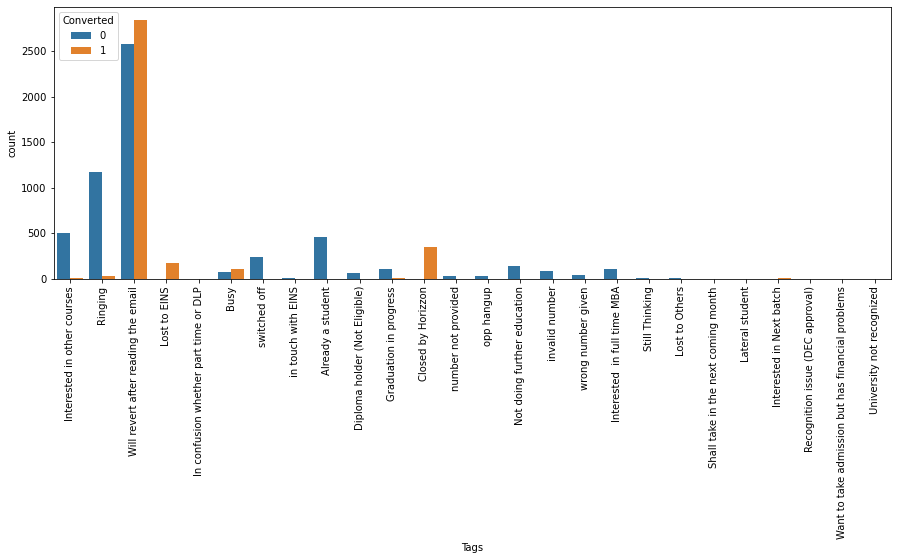

In [71]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.show()


Result to be written pending***************

### LeadQuality

In [72]:
Leads["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

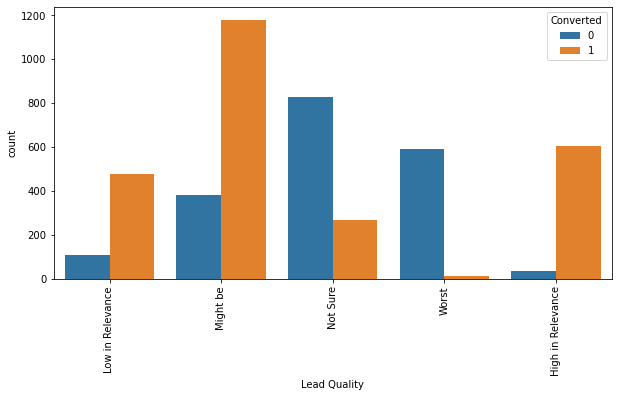

In [73]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.show()

Need to write inference here ***************

## Update me on Supply Chain Content

In [74]:
Leads["Update me on Supply Chain Content"].value_counts()

0    9240
Name: Update me on Supply Chain Content, dtype: int64

Most entries are 'No'. No Inference can be drawn with this parameter.

## Get updates on DM Content

In [75]:
Leads["Get updates on DM Content"].value_counts()

0    9240
Name: Get updates on DM Content, dtype: int64

Most entries are 'No'. No Inference can be drawn with this parameter.

## I agree to pay the amount through cheque

In [76]:
Leads["I agree to pay the amount through cheque"].value_counts()

0    9240
Name: I agree to pay the amount through cheque, dtype: int64

Most entries are 'No'. No Inference can be drawn with this parameter.

## A free copy of Mastering The Interview

In [77]:
Leads['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

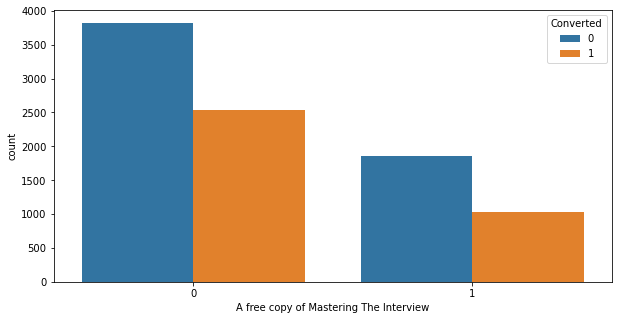

In [78]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = Leads)
plt.show()

Results to be written*************

## CITY

In [79]:

counts = pd.DataFrame(Leads['City'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Mumbai                        6891  74.58
Thane & Outskirts              752   8.14
Other Cities                   686   7.42
Other Cities of Maharashtra    457   4.95
Other Metro Cities             380   4.11
Tier II Cities                  74   0.80

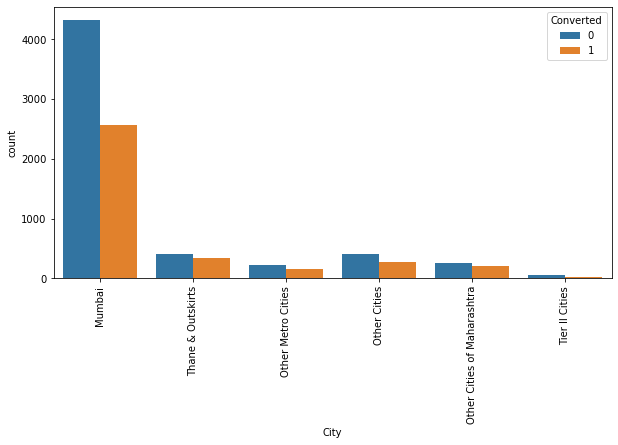

In [80]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'City', hue = 'Converted', data = Leads)
xticks(rotation = 90)
plt.show()

In [81]:
Leads['City'].fillna('Mumbai',inplace=True)
counts = pd.DataFrame(Leads['City'].value_counts())
counts.columns ={'count'}
counts['%'] = counts['count'].apply(lambda x: round(100*(x/len(Leads)),2)) 
counts

count      %
Mumbai                        6891  74.58
Thane & Outskirts              752   8.14
Other Cities                   686   7.42
Other Cities of Maharashtra    457   4.95
Other Metro Cities             380   4.11
Tier II Cities                  74   0.80

Result to be written

## Last Notable Activity

In [82]:
Leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

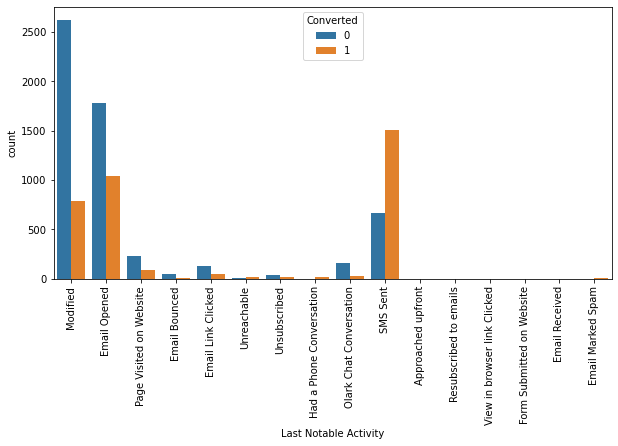

In [83]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Leads)
xticks(rotation = 90)
plt.show()

Result to be written################

# Drop columns :
 - Missing data more than 40 % : ['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
 - Highly skewed Categorical data : ['What matters most to you in choosing a course', 'What is your current occupation',’ Country’,'Mumbai']
 - Sales team columns : ['Tags','Lead Quality','Lead Profile','Last Notable Activity']

In [84]:
missing40 = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']
skewedCol = ['What matters most to you in choosing a course', 'What is your current occupation','Country','City']
sales= ['Tags','Lead Quality','Lead Profile','Last Activity','Last Notable Activity']
idcolumns= ['Lead Number']
delColumns = missing40+skewedCol+sales+idcolumns
delColumns

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Profile Score',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'City',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Last Activity',
 'Last Notable Activity',
 'Lead Number']

In [85]:
Leads = Leads.drop(delColumns,axis=1)
Leads.shape

(9240, 22)

In [86]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9204 non-null   object 
 3   Do Not Email                              9240 non-null   int64  
 4   Do Not Call                               9240 non-null   int64  
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9240 non-null   float64
 9   Specialization                            9240 non-null   object 
 10  Search                              

## Create Dummy variables 

In [87]:
Leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Others                      774
Name: Lead Origin, dtype: int64

In [88]:
Leads['Lead Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Others             879
Name: Lead Source, dtype: int64

In [89]:
Leads['Specialization'].value_counts()

Finance Management           4356
Others                       3198
Human Resource Management     848
Marketing Management          838
Name: Specialization, dtype: int64

In [90]:
LDummy = pd.get_dummies(Leads[['Lead Origin','Lead Source','Specialization']],drop_first=True)
Leads =  pd.concat([Leads,LDummy], axis=1 )
Leads = Leads.drop(['Lead Origin','Lead Source','Specialization'], 1)
Leads.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  Search  \
0          0.0                            0                   0.0       0   
1          5.0                          674                   2.5       0   
2          2.0                         1532                   2.0       0   
3          1.0                          305                   1.0       0   
4          2.0                         1428                   1.0       0   

   Magazine  Newspaper Article  X Education Forums  Newspaper  \
0         0                  0                   0          0   
1         0                  0                   0          0   
2         0                  0                   0          0   
3         0                  0                   0          0   
4         0                  0                   0          0   

   Digital Advertisement  Through Recommendations  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   Receive More Updates About Our Courses  Update me on Supply Chain Content  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Get updates on DM Content  I agree to pay the amount through cheque  \
0                          0                                         0   
1                          0                                         0   
2                          0                                         0   
3                          0                                         0   
4                          0                                         0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Others  \
0                                    0                   0   
1                                    0                   0   
2                                    1                   0   
3                                    1                   0   
4                                    1                   0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Specialization_Human Resource Management  \
0                   0                                         0   
1                   0                                         0   
2                   0                                         0   
3                   0                                         0   


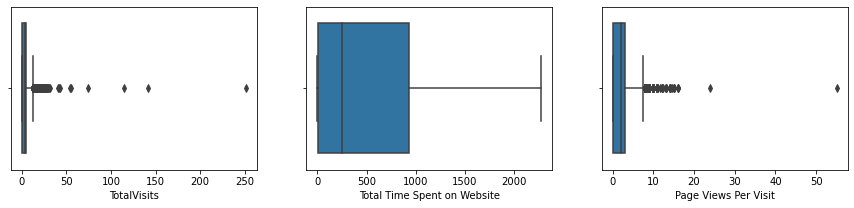

In [91]:
plt.figure(figsize = (15,3))
scaleColumns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
n= 1
for i in scaleColumns:
    plt.subplot(1,3,n)
    n=n+1
    sns.boxplot(Leads[i])

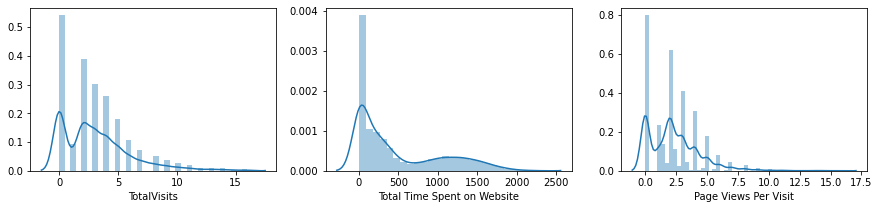

In [92]:
plt.figure(figsize = (15,3))
scaleColumns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
n= 1
for i in scaleColumns:
    plt.subplot(1,3,n)
    n=n+1
    sns.distplot(Leads[Leads['TotalVisits']<Leads['TotalVisits'].quantile(.99)][i])

# Logistic Regression 

### Step 1: Test-Train Split

In [93]:
from sklearn.model_selection import train_test_split
X = Leads.drop(['Converted','Prospect ID'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Magazine  Newspaper Article  \
0                   0.0       0         0                  0   
1                   2.5       0         0                  0   
2                   2.0       0         0                  0   
3                   1.0       0         0                  0   
4                   1.0       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Others  \
0                                    0                   0   
1                                    0                   0   
2                                    1                   0   
3                                    1                   0   
4                                    1                   0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Specialization_Human Resource Management  \
0                   0                                         0   
1                   0                                         0   
2                   0                                         0   
3                   0                                         0   
4                   0                                         0   

   Specialization_Marketing Management  Specialization_Others  
0                                    0                      0  
1                                    0                      0  
2        

In [94]:
Y = Leads['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

### Step 2: Feature Scaling

In [96]:
scaler = StandardScaler()
X_train[scaleColumns] = scaler.fit_transform(X_train[scaleColumns])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -0.645678                    -0.885371   
6795             0            0     0.109111                     0.005716   
3516             0            0     0.297808                    -0.691418   
8105             0            0     0.297808                     1.365219   
3934             0            0    -0.645678                    -0.885371   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
1871             -1.062143       0         0                  0   
6795             -0.452487       0         0                  0   
3516              0.083827       0         0                  0   
8105              1.229797       0         0                  0   
3934             -1.062143       0         0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
1871                   0          0                      0   
6795                   0          0                      0   
3516                   0          0                      0   
8105                   0          0                      0   
3934                   0          0                      0   

      Through Recommendations  Receive More Updates About Our Courses  \
1871                        0                                       0   
6795                        0                                       0   
3516                        0                                       0   
8105                        0                                       0   
3934                        0                                       0   

      Update me on Supply Chain Content  Get updates on DM Content  \
1871                                  0                          0   
6795                                  0                          0   
3516                                  0                          0   
8105                                  0                          0   
3934                                  0                          0   

      I agree to pay the amount through cheque  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934                                         0   

      A free copy of Mastering The Interview  \
1871                                       0   
6795                                       1   
3516                                       0   
8105                                       0   
3934                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Others  \
1871                                    0                   0   
6795                                    1                   0   
3516                                    0                   0   
8105                                    1                   0   
3934                                    0                   0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
1871                   0                       1                           0   
6795                   0                       0                           0   
3516                   0                       1                           0   
8105                   1                       0                           0   
3934                   0                       1                           0   

      Lead Source_Others  Specialization_Human Resource Management  \
1871                   0                                         0   
6795                   0                                         0   
3516                   0                                         0   
8105                   0                                         0   
3934                   0                                         0   

      Specialization_Mar

In [97]:
Converted = (sum(Y_train)/len(Y_train))*100
Converted

38.12615955473098

In [98]:
X_train.shape,X_test.shape

((6468, 26), (2772, 26))

### Model building

In [99]:
import statsmodels.api as sm

In [100]:
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3240.5
Date:                Mon, 11 Jan 2021   Deviance:                       6481.0
Time:                        16:38:56   Pearson chi2:                 6.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2537      0.113    -11.084      0.000      -1.475      -1.032
Do Not Email                                -1.3534      0.148     -9.120      0.000      -1.644      -1.063
Do Not Call                                 20.5674   3.39e+04      0.001      1.000   -6.65e+04    6.65e+04
TotalVisits                                  0.1211      0.043      2.837      0.005       0.037       0.205
Total Time Spent on Website                  1.1008      0.036     30.198      0.000       1.029       1.172
Page Views Per Visit                        -0.0213      0.045     -0.472      0.637      -0.110       0.067
Search                                       0.1308      0.733      0.178      0.858      -1.307       1.568
Magazine                                 -3.924e-10   1.72e-06     -0.000      1.000   -3.38e-06    3.37e-06
Newspaper Article                           22.7902   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
X Education Forums                         -27.1682   7.62e+04     -0.000      1.000   -1.49e+05    1.49e+05
Newspaper                                  -23.8762   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement                      -20.8693   3.41e+04     -0.001      1.000   -6.68e+04    6.68e+04
Through Recommendations                      2.4617      1.306      1.884      0.060      -0.099       5.022
Receive More Updates About Our Courses   -2.389e-10   1.01e-06     -0.000      1.000   -1.97e-06    1.97e-06
Update me on Supply Chain Content        -6.239e-10   5.91e-07     -0.001      0.999   -1.16e-06    1.16e-06
Get updates on DM Content                  -3.4e-10   4.27e-07     -0.001      0.999   -8.37e-07    8.36e-07
I agree to pay the amount through cheque -1.818e-10   4.89e-07     -0.000      1.000   -9.59e-07    9.59e-07
A free copy of Mastering The Interview      -0.0995      0.095     -1.046      0.296      -0.286       0.087
Lead Origin_Landing Page Submission         -0.2516      0.104     -2.424      0.015      -0.455      -0.048
Lead Origin_Others                           3.9378      0.262     15.046      0.000       3.425       4.451
Lead Source_Google                           0.2849      0.100      2.835      0.005       0.088       0.482
Lead Source_Olark Chat                       0.9961      0.140      7.123      0.000       0.722       1.270
Lead Source_Organic Search                   0.1692      0.114      1.485      0.138      -0.054       0.393
Lead Source_Others                          -0.0836      0.235     -0.355      0.722      -0.545       0.378
Specialization_Human Resource Management     0.5405      0.122      4.440      0.000       0.302       0.779
Specialization_Marketing Manage

Many columns has p value as 1 
Let's check the VIF values 

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
18                        Lead Origin_Others  5.08
17       Lead Origin_Landing Page Submission  4.74
22                        Lead Source_Others  4.72
25                     Specialization_Others  2.75
8                         X Education Forums  2.73
16    A free copy of Mastering The Interview  2.63
7                          Newspaper Article  2.01
4                       Page Views Per Visit  1.98
19                        Lead Source_Google  1.59
10                     Digital Advertisement  1.51
20                    Lead Source_Olark Chat  1.49
23  Specialization_Human Resource Management  1.45
24       Specialization_Marketing Management  1.40
2                                TotalVisits  1.32
11                   Through Recommendations  1.25
21                Lead Source_Organic Search  1.23
3                Total Time Spent on Website  1.23
5                                     Search  1.18
0                               Do Not Email  1.10
1                                Do Not Call  1.00
9                                  Newspaper  1.00
6                                   Magazine   NaN
12    Receive More Updates About Our Courses   NaN
13         Update me on Supply Chain Content   NaN
14                 Get updates on DM Content   NaN
15  I agree to pay the amount through cheque   NaN

Droping columns one by one to reach significant 'p' values

In [103]:
col = X_train.columns
col = col.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Newspaper','X Education Forums'
               ,'Do Not Call','Digital Advertisement','Search','Lead Source_Others','Newspaper Article','Page Views Per Visit','A free copy of Mastering The Interview','Through Recommendations','Lead Source_Organic Search'])
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management', 'Specialization_Others'],
      dtype='object')

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3248.6
Date:                Mon, 11 Jan 2021   Deviance:                       6497.1
Time:                        16:38:57   Pearson chi2:                 6.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2171      0.087    -13.924      0.000      -1.388      -1.046
Do Not Email                                -1.3493      0.148     -9.125      0.000      -1.639      -1.060
TotalVisits                                  0.1172      0.038      3.048      0.002       0.042       0.193
Total Time Spent on Website                  1.0980      0.036     30.214      0.000       1.027       1.169
Lead Origin_Landing Page Submission         -0.3108      0.096     -3.233      0.001      -0.499      -0.122
Lead Origin_Others                           3.8472      0.167     23.047      0.000       3.520       4.174
Lead Source_Google                           0.2789      0.074      3.770      0.000       0.134       0.424
Lead Source_Olark Chat                       0.9751      0.120      8.096      0.000       0.739       1.211
Specialization_Human Resource Management     0.5242      0.121      4.335      0.000       0.287       0.761
Specialization_Marketing Management          0.6211      0.118      5.247      0.000       0.389       0.853
Specialization_Others                        0.6374      0.088      7.260      0.000       0.465       0.809
============================================================================================================
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3       Lead Origin_Landing Page Submission  3.42
9                     Specialization_Others  2.60
7  Specialization_Human Resource Management  1.42
8       Specialization_Marketing Management  1.38
5                        Lead Source_Google  1.31
2               Total Time Spent on Website  1.23
6                    Lead Source_Olark Chat  1.23
4                        Lead Origin_Others  1.19
1                               TotalVisits  1.16
0                              Do Not Email  1.09

All VIF values are below 5 

### Column selection with RFE

In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 10)             
rfe = rfe.fit(X_train, Y_train)

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_Others', 'Lead Source_Olark Chat',
       'Specialization_Marketing Management', 'Specialization_Others'],
      dtype='object')

In [107]:
logm2 = sm.GLM(Y_train,(sm.add_constant(X_train[rfe_col])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3270.2
Date:                Mon, 11 Jan 2021   Deviance:                       6540.4
Time:                        16:39:00   Pearson chi2:                 6.73e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.0941      0.053    -20.553      0.000      -1.198      -0.990
Do Not Email                           -1.3852      0.147     -9.444      0.000      -1.673      -1.098
Total Time Spent on Website             1.1133      0.036     30.680      0.000       1.042       1.184
X Education Forums                     -3.6011   3.58e+04     -0.000      1.000   -7.01e+04    7.01e+04
Newspaper                             -23.1774   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                 -20.1060   2.06e+04     -0.001      0.999   -4.05e+04    4.04e+04
Through Recommendations                 2.1909      1.232      1.779      0.075      -0.223       4.605
Lead Origin_Others                      3.7857      0.146     25.992      0.000       3.500       4.071
Lead Source_Olark Chat                  0.8367      0.093      8.960      0.000       0.654       1.020
Specialization_Marketing Management     0.4041      0.108      3.732      0.000       0.192       0.616
Specialization_Others                   0.3718      0.070      5.285      0.000       0.234       0.510
=======================================================================================================
"""

 - 'X Education Forums','Newspaper','Digital Advertisement' has high p-values 
 -  Make prediction based on 'col' as all the columns are significant in the list

### Make prediction

In [108]:
# switch
Y_train_pred = logm1.fit().predict(X_train_sm)


# X_train_sm = sm.add_constant(X_train[rfe_col])
# Y_train_pred = logm2.fit().predict(X_train_sm)


Y_train_pred.head()

1871    0.338777
6795    0.181111
3516    0.275615
8105    0.715498
3934    0.215879
dtype: float64

In [109]:
y_train_pred = pd.DataFrame({'Converted':Y_train.values, 'Converted_Prob':Y_train_pred})

y_train_pred.head()

Converted  Converted_Prob
1871          0        0.338777
6795          0        0.181111
3516          0        0.275615
8105          0        0.715498
3934          0        0.215879

## ROC Curve

In [110]:
from sklearn import metrics

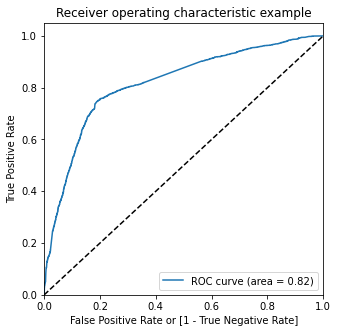

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred.Converted, y_train_pred.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred.Converted, y_train_pred.Converted_Prob)

ROC value = 0.82 a good trade off between True Positive Rate and False Positive Rate 


### Finding Optimal Cut-off point

In [112]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

Converted  Converted_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
1871          0        0.338777    1    1    1    1    0    0    0    0    0   
6795          0        0.181111    1    1    0    0    0    0    0    0    0   
3516          0        0.275615    1    1    1    0    0    0    0    0    0   
8105          0        0.715498    1    1    1    1    1    1    1    1    0   
3934          0        0.215879    1    1    1    0    0    0    0    0    0   

      0.9  
1871    0  
6795    0  
3516    0  
8105    0  
3934    0

In [113]:


cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity/recall','specificity','precision'])
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    
    
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity,precision]
cutoff_df

prob  accuracy  sensitivity/recall  specificity  precision
0.0   0.0  0.381262            1.000000     0.000000   0.381262
0.1   0.1  0.435683            0.987429     0.095702   0.402213
0.2   0.2  0.596320            0.912814     0.401299   0.484399
0.3   0.3  0.776438            0.762774     0.784858   0.685996
0.4   0.4  0.784168            0.690592     0.841829   0.729024
0.5   0.5  0.771181            0.609489     0.870815   0.744059
0.6   0.6  0.753401            0.513788     0.901049   0.761876
0.7   0.7  0.727118            0.394566     0.932034   0.781526
0.8   0.8  0.698980            0.269667     0.963518   0.819975
0.9   0.9  0.653989            0.103406     0.993253   0.904255

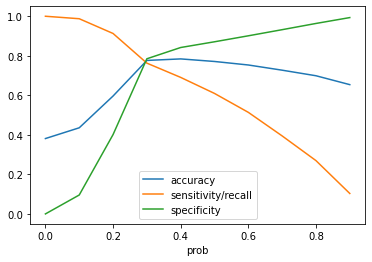

In [114]:
# plt.subplot(1,2,1)
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity/recall','specificity'])
plt.savefig('pic3.png')

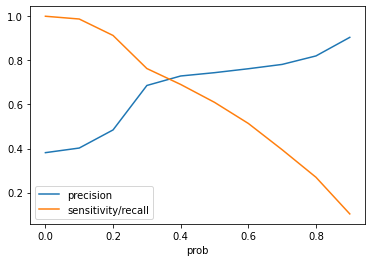

In [115]:
cutoff_df.plot.line(x='prob', y=['precision','sensitivity/recall'])
plt.savefig('pic4.png')

the cut of seems to be between 0.2 & 0.4. Lets take a closer look

In [116]:
numbers = [float(x)/100 for x in range(27,39)]
Y_Pred = y_train_pred[:]
for i in numbers:
    Y_Pred[i]= Y_Pred.Converted_Prob.map(lambda x: 1 if x > i else 0)
Y_Pred.head()

Converted  Converted_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
1871          0        0.338777    1    1    1    1    0    0    0    0    0   
6795          0        0.181111    1    1    0    0    0    0    0    0    0   
3516          0        0.275615    1    1    1    0    0    0    0    0    0   
8105          0        0.715498    1    1    1    1    1    1    1    1    0   
3934          0        0.215879    1    1    1    0    0    0    0    0    0   

      0.9  0.27  0.28  0.29  0.31  0.32  0.33  0.34  0.35  0.36  0.37  0.38  
1871    0     1     1     1     1     1     1     0     0     0     0     0  
6795    0     0     0     0     0     0     0     0     0     0     0     0  
3516    0     1     0     0     0     0     0     0     0     0     0     0  
8105    0     1     1     1     1     1     1     1     1     1     1     1  
3934    0     0     0     0     0     0     0     0     0     0     0     0

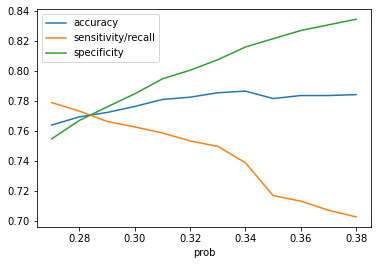

In [117]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity/recall','specificity','precision'])
for i in numbers:
    cm1 = metrics.confusion_matrix(Y_Pred.Converted, Y_Pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    
    
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity,precision]

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity/recall','specificity'])
plt.savefig('pic5.png')


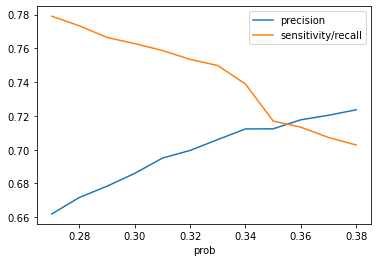

In [118]:
cutoff_df.plot.line(x='prob', y=['precision','sensitivity/recall'])
plt.savefig('pic6.png')

In [119]:
print(metrics.accuracy_score(Y_Pred.Converted, Y_Pred[0.3]))

0.7764378478664193


In [120]:
y_train_pred['final_predicted'] =y_train_pred.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)
print(round(metrics.accuracy_score(y_train_pred.Converted, y_train_pred['final_predicted']),2))

0.77


 - 'accuracy','sensitivity/recall','specificity' cut of is at 0.28 
 - we are targeting higher recall value 
 - so taking 0.28 as threshold value 

# Prediction on Test set

In [121]:
X_test[scaleColumns] = scaler.transform(X_test[scaleColumns])
# switch
X_test_sm = sm.add_constant(X_test[col])
# X_test_sm =  sm.add_constant(X_test[rfe_col])

Y_test_pred = logm1.fit().predict(X_test_sm)




In [122]:
Y_Test_Pred = pd.DataFrame({'Converted':Y_test.values, 'Converted_Prob':Y_test_pred})
Y_Test_Pred['prediction'] = Y_Test_Pred['Converted_Prob'].apply(lambda x: 1 if x > 0.28 else 0 )
Y_Test_Pred.head()

Converted  Converted_Prob  prediction
4269          1        0.485784           1
2376          1        0.829530           1
7766          1        0.246101           0
9199          0        0.215879           0
4359          1        0.900554           1

In [123]:
confusion2 = metrics.confusion_matrix(Y_Test_Pred.Converted, Y_Test_Pred.prediction )

total1=sum(sum(confusion2))
accuracy = (confusion2[0,0]+confusion2[1,1])/total1
sensitivity = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
specificity = confusion2[0,0]/(confusion2[0,0]+confusion2[0,1])
precision = confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])


columns = ['accuracy','sensitivity/recall','specificity','precision'] 
value  =  [accuracy,sensitivity,specificity,precision]
df = pd.DataFrame( columns = ['accuracy','sensitivity/recall','specificity','precision'])
df.loc[1] = [round(accuracy,2),round(sensitivity,2),round(specificity,2),round(precision,2)]

df

accuracy  sensitivity/recall  specificity  precision
1      0.76                0.78         0.75       0.67

##### 78% of the actual Hot Leads can be predicted by this model

# Assigning Score value to the leads

In [124]:
Leads[scaleColumns] = scaler.transform(Leads[scaleColumns])

In [125]:
X_l_sm = sm.add_constant(Leads[col])
Y_l_pred = logm1.fit().predict(X_l_sm)
Leads['score'] = Y_l_pred * 100

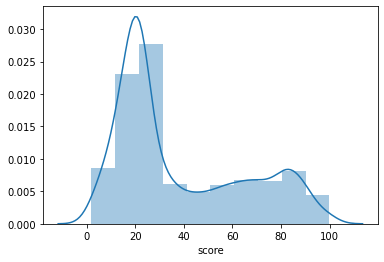

In [131]:
sns.distplot(Leads['score'],bins=10)

Score Distribution  - most of the Leads are having score between 10 to 30 . These Leads are not likely to convert 